In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
#database_path = "pets_db"
#engine = create_engine(f"sqlite:///{database_path}")


# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15f37ee2430>,
 'tobs': 81.0,
 'id': 2724,
 'date': '2017-08-23',
 'prcp': 0.0,
 'station': 'USC00519397'}

In [95]:
for row in session.query(Measurement).order_by(Measurement.id.desc()).limit(10):
    print(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F40F7F970>, 'tobs': 76.0, 'id': 19550, 'date': '2017-08-23', 'prcp': 0.45, 'station': 'USC00516128'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F40F95B20>, 'tobs': 76.0, 'id': 19549, 'date': '2017-08-22', 'prcp': 0.5, 'station': 'USC00516128'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F40F956D0>, 'tobs': 76.0, 'id': 19548, 'date': '2017-08-21', 'prcp': 0.56, 'station': 'USC00516128'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F40F95BE0>, 'tobs': 78.0, 'id': 19547, 'date': '2017-08-20', 'prcp': None, 'station': 'USC00516128'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F40E72610>, 'tobs': 71.0, 'id': 19546, 'date': '2017-08-19', 'prcp': 0.09, 'station': 'USC00516128'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F3F131190>, 'tobs': 76.0, 'i

In [11]:
# Find the most recent date in the data set.
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
earliest_date



('2010-01-01',)

In [12]:
#find data types

inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [104]:
from itertools import islice
last_12_mths = session.query(Measurement).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date)
iterator = islice(last_12_mths,10)

for row in iterator:
    print(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F40DB8AF0>, 'tobs': 81.0, 'id': 2364, 'date': '2016-08-23', 'prcp': 0.0, 'station': 'USC00519397'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F40DB8220>, 'tobs': 76.0, 'id': 5091, 'date': '2016-08-23', 'prcp': 0.15, 'station': 'USC00513117'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F4115B0A0>, 'tobs': 80.0, 'id': 7331, 'date': '2016-08-23', 'prcp': 0.05, 'station': 'USC00514830'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F4115B640>, 'tobs': 80.0, 'id': 8825, 'date': '2016-08-23', 'prcp': None, 'station': 'USC00517948'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F4115B520>, 'tobs': 80.0, 'id': 11851, 'date': '2016-08-23', 'prcp': 0.02, 'station': 'USC00519523'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000015F4115B400>, 'tobs': 77.0, 'id': 

In [22]:
# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date).filter(Measurement.date >= '2016-08-23').all()
year_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date).filter(Measurement.date >= '2016-08-23').all()
year_data
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(year_data)
year_df.set_index('date',inplace=True)

year_df.sort_index
year_df




,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [30]:
# Perform a query to retrieve the data and precipitation scores
year_data2 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
year_data2
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df2 = pd.DataFrame(year_data2)
year_df2.set_index('date',inplace=True)

year_df2.sort_index
year_df2


# Sort the dataframe by date



,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [28]:
x_axis = np.arange(len(year_df2))
tick_locations = [value for value in x_axis]

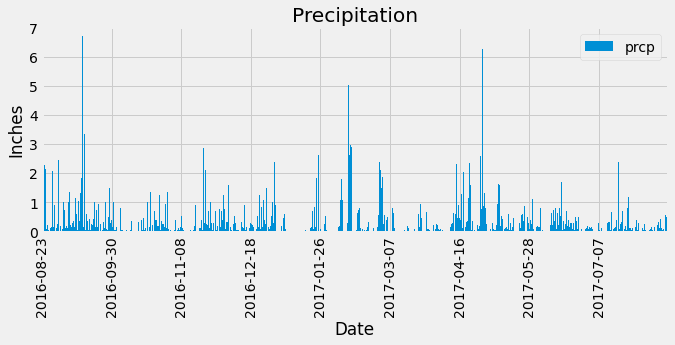

<Figure size 432x288 with 0 Axes>

In [29]:
chart = year_df2.plot(kind="bar", figsize=(10,3.5),width=3, label='precipitation')
plt.title("Precipitation")
plt.locator_params(axis='x', nbins=9)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation="vertical")
chart.legend()
plt.ylim(0,7)
plt.show()
plt.tight_layout()

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_df2.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number stations in the dataset
all_stations = session.query(Station.station).all()
stations = []
for station in all_stations:
    if station not in stations:
        stations.append(station)

len(stations)

9

In [33]:
stations2 = []
for i in range(9):
    stations2.append(stations[i][0])
    
stations2

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [34]:
len(stations)

9

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
grouped_stations = session.query(Station.station, func.count(Station.station)).group_by(Station.station).order_by(func.count(Station.station).desc()).all()
grouped_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# viewing session query data layout
station_query = session.query(Station).first()
station_query.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15f3f257220>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Station.tobs)).filter(Station.station == 'USC00519281').all()
highest_temp = session.query(func.max(Station.tobs)).filter(Station.station == 'USC00519281').all()
average_temp = session.query(func.avg(Station.tobs)).filter(Station.station == 'USC00519281').all()
average_temp = round((average_temp[0][0]),1)
print(f"The lowest temp of most active station,USC00519281, is {lowest_temp[0][0]} degrees F.") 
print(f"The highest temp of most active station,USC00519281, is {highest_temp[0][0]} degrees F.") 
print(f"The average temp of most active station,USC00519281, is {average_temp} degrees F.") 

The lowest temp of most active station,USC00519281, is 54.0 degrees F.
The highest temp of most active station,USC00519281, is 85.0 degrees F.
The average temp of most active station,USC00519281, is 71.7 degrees F.


In [107]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(Station.tobs,Station.date).filter(Station.station == 'USC00519281').filter(Station.date >= '2016-08-23').all()
temp_df = pd.DataFrame(temperatures)
temp_df

,tobs,date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


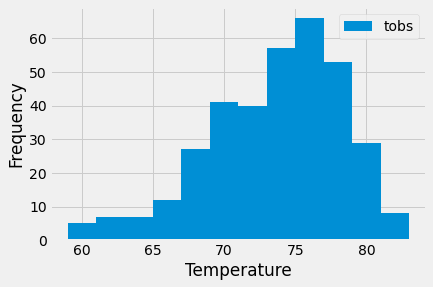

In [93]:
a = np.array(temperatures)
legend = ['tobs']
fig, ax = plt.subplots()
ax.hist(a, bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

# Close session

In [21]:
# Close Session
session.close()